# Questions to be asked 

### What is the distribution of conservation_status for animals?
### Are certain types of species more likely to be endangered?
### Are the differences between species and their conservation status significant?
### Which species were spotted the most at each park?

In [23]:
# import modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Use pandas to read and create df from csv file

In [24]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

#### Inspect Data

In [25]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [26]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


#### Find out how many and what unique species categories in df

In [27]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [28]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

#### Change nan of conservation status 

The IUCN Red List of Threatened Species has a "Least Concern" category. A species is considered Least Concern if it is not threatened by extinction and is widespread and abundant. 

The NatureServe Conservation Status Ranks also have a "Secure" category. A species is considered Secure if it has a very low risk of extinction and abundant populations.

In [29]:
species = species.fillna('Least Concern')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern


#### Find if anuy duplicate names exist

In [30]:
species[species.duplicated(subset=['common_names'])]
# species[species.common_names == 'Marsh Rice Rat']

,category,scientific_name,common_names,conservation_status
59,Mammal,Oryzomys palustris palustris,Marsh Rice Rat,Least Concern
124,Bird,Melanitta fusca,White-Winged Scoter,Least Concern
243,Bird,Anthus spinoletta,Water Pipit,Least Concern
278,Bird,Vermivora chrysoptera X pinus,Brewster's Warbler,Least Concern
280,Bird,Vermivora lawrencii,Lawrence's Warbler,Least Concern
...,...,...,...,...
5753,Vascular Plant,Rosa woodsii var. ultramontana,Woods' Rose,Least Concern
5757,Vascular Plant,Rubus parviflorus,"Thimbleberry, Western Thimbleberry",Least Concern
5788,Vascular Plant,Ribes viscosissimum,Sticky Currant,Least Concern
5795,Vascular Plant,Heuchera rubescens var. glandulosa,Pink Alumroot,Least Concern


In [31]:
species[species.duplicated(subset=['scientific_name'])]
# species[species.scientific_name.str.contains('Odocoileus virginianus')]
# species[species.common_names.str.contains('Elk')]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Least Concern
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",Least Concern
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern
3025,Mammal,Lutra canadensis,River Otter,Least Concern
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",Least Concern
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",Least Concern
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",Least Concern
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",Least Concern


#### As every scientific name is unique to one species, dropping duplicate scientific names cleans up duplicate data

In [32]:
species.drop_duplicates('scientific_name', inplace=True)
species[species.scientific_name.duplicated()]

,category,scientific_name,common_names,conservation_status


In [33]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5229,5
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,Least Concern
freq,4262,1,7,5363


#### Explore Observations df

In [34]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Find if there is any duplicates in scientific name and park categories

In [35]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


#### Drop duplicated species and park holding onto the higher observed data

In [36]:
observations[(observations.scientific_name == 'Agrostis gigantea') & (observations.park_name == 'Yellowstone National Park')]
idx = observations.groupby(['scientific_name', 'park_name'])['observations'].idxmax()
observations = observations.loc[idx]
observations[observations.duplicated()]

,scientific_name,park_name,observations


#### Show sum observations in each park and that 5541 unique species have been observed in each park


In [37]:
grouped_df = observations.groupby('park_name').agg({'observations': 'sum', 'scientific_name': 'nunique'}).reset_index()
grouped_df

,park_name,observations,scientific_name
0,Bryce National Park,551558,5541
1,Great Smoky Mountains National Park,414137,5541
2,Yellowstone National Park,1376862,5541
3,Yosemite National Park,824762,5541


#### Plot Graph showing num of species in each category

In [38]:
cat_species = species.groupby('category')['scientific_name'].count().reset_index()
cat_species

,category,scientific_name
0,Amphibian,79
1,Bird,488
2,Fish,125
3,Mammal,176
4,Nonvascular Plant,333
5,Reptile,78
6,Vascular Plant,4262


### Plot showing vascular plant being the most dominant category

<AxesSubplot:xlabel='category', ylabel='scientific_name'>

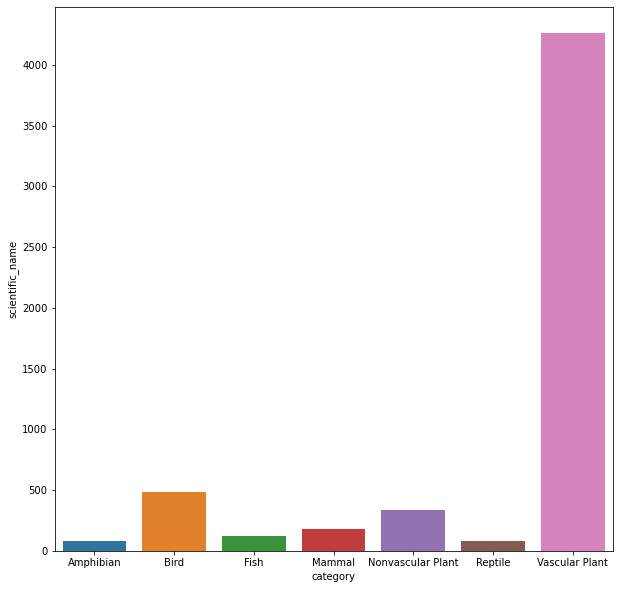

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(data=cat_species, x='category', y='scientific_name')

In [40]:
filtered_species = species[species != 'Least Concern']
conserv_species = filtered_species.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack('category').reset_index()
conserv_species.fillna(0)

category,conservation_status,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Endangered,1.0,4.0,3.0,6.0,0.0,0.0,1.0
1,In Recovery,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
3,Threatened,2.0,0.0,3.0,2.0,0.0,0.0,2.0


### Plot showing num of species category by conservation label, which appears to be birds followed closely by vascular plants

Text(0.5, 1.0, 'Num of species category by conservation label')

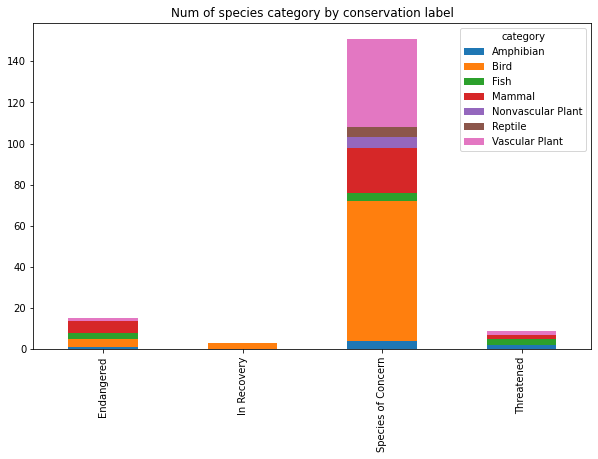

In [41]:
conserv_species.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks([0,1,2,3], list(conserv_species.conservation_status.unique()))
plt.title('Num of species category by conservation label')

### Total observations by park

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bryce National Park'),
  Text(1, 0, 'Great Smoky Mountains National Park'),
  Text(2, 0, 'Yellowstone National Park'),
  Text(3, 0, 'Yosemite National Park')])

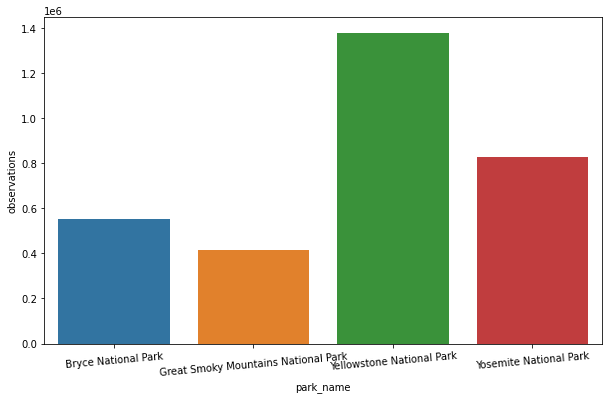

In [42]:
grouped_df = observations.groupby('park_name').agg({'observations': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='park_name', y='observations') 
plt.xticks(rotation=5)

### Number of observations of park by conservation category

In [43]:
merged_df = pd.merge(species, observations, on='scientific_name')

In [83]:
fig = plt.figure(figsize=(16, 8))
new_df = merged_df[merged_df.conservation_status != 'Least Concern']
show_data = new_df.groupby(['conservation_status', 'park_name'])['observations'].sum().unstack()
show_data
# sns.barplot(x='park_name', y='observations', data=new_df, hue='conservation_status', estimator=np.sum)
# plt.title('Number of observations for each conservation status by park')

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
conservation_status,,,,
Endangered,433,305,1101,668
In Recovery,258,189,559,386
Species of Concern,14085,9740,33713,20270
Threatened,427,340,1087,672


<Figure size 1152x576 with 0 Axes>

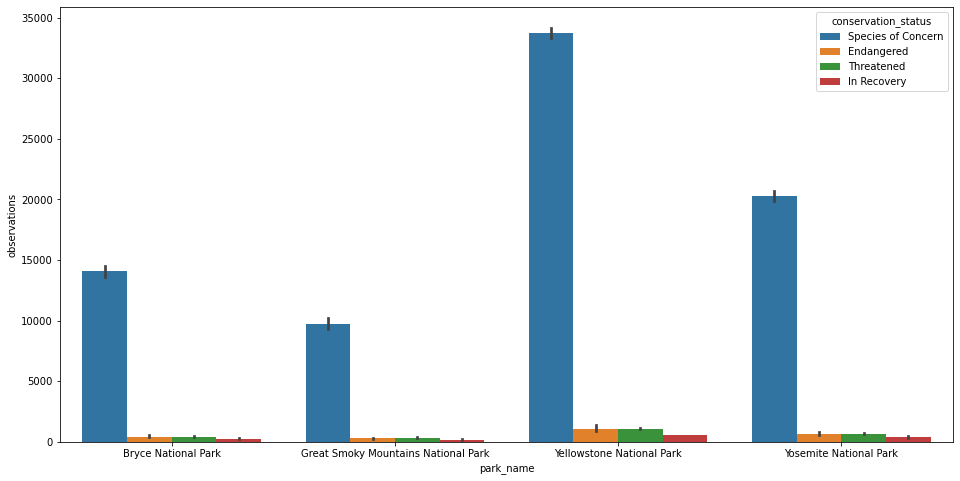

In [84]:
plt.figure(figsize=(16,8))
sns.barplot(x='park_name', y='observations', hue='conservation_status', data=new_df, estimator=np.sum)
ax.legend(loc='upper left')

<AxesSubplot:xlabel='park_name', ylabel='observations'>

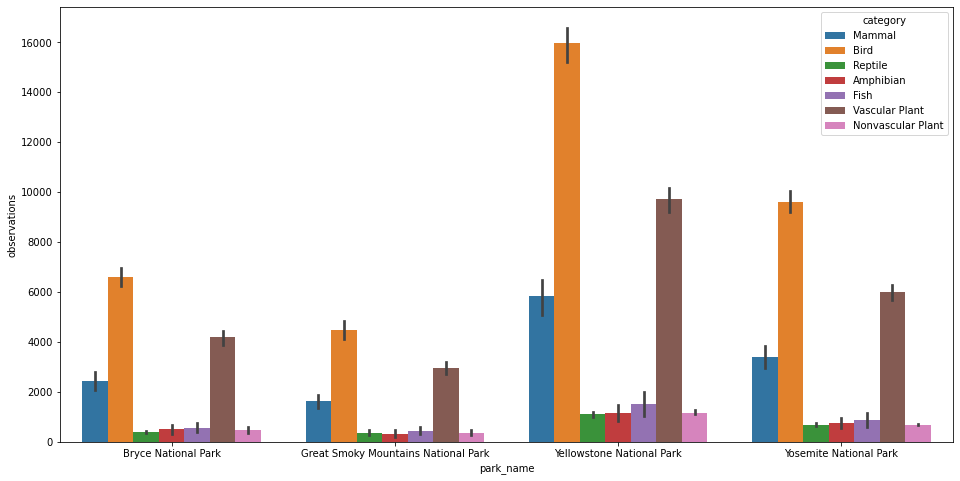

In [86]:
plt.figure(figsize=(16,8))
sns.barplot(x='park_name', y='observations', hue='category', data=new_df, estimator=np.sum)

## What is the distribution of conservation_status for animals?¶
###  - The distribution of conservation status was Least Concern for most species, Birds had the the worst conservation status compared to their total species count, vascular plants was high also but not relative to their total species count.
## Are certain types of species more likely to be endangered?
###   - Birds were more likely to be endangered.
## Are the differences between species and their conservation status significant?
###   - Not when compared to their total species count.
## Which species were spotted the most at each park?
###   - Vascular plants, followed by Birds and then Mammals